In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%load_ext autotime

train = pd.read_csv("./res/house-prices-advanced-regression-techniques/train.csv")
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


time: 204 ms


In [2]:
train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

time: 0 ns


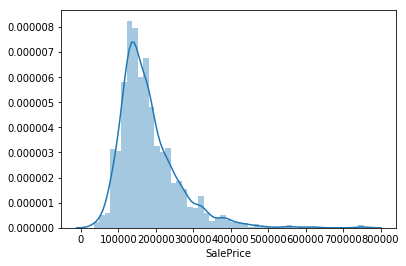

time: 390 ms


In [3]:
sns.distplot(train["SalePrice"])

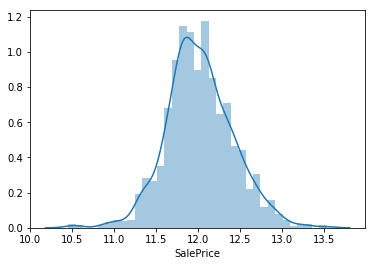

time: 297 ms


In [4]:
log_sale_price = np.log1p(train["SalePrice"])
sns.distplot(log_sale_price)

In [5]:
train["SalePrice"] = log_sale_price

# 널 많은 컬럼 삭제
drop_cols = ["Id", "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
train.drop(columns=drop_cols, axis=1, inplace=True)

#정수형 데이터 평균 값 대치
train.fillna(train.mean(), inplace=True)

#정수형 이외 널이 존재하는 칼람 추출
#train.isnull().sum() 결과에서 0보다 큰 항들의 인덱스 추출
null_column = train.isnull().sum()[train.isnull().sum() > 0]

print(train.dtypes[null_column.index])

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object
time: 171 ms


In [7]:
#문자열 속성 가변수로 카테고리화
#get_dummies는 컬럼 미지정시 문자열 속성들을 변환 수행
print("before get dummies train.shape : {}".format(train.shape))
train_oh = pd.get_dummies(train)
print("after get dummies train.shape : {}".format(train.shape))
null_column = train_oh.isnull().sum()[train_oh.isnull().sum() > 0]

print(train.dtypes[null_column.index])

before get dummies train.shape : (1460, 75)
after get dummies train.shape : (1460, 75)
Series([], dtype: object)
time: 125 ms


In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def get_rmse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("#### model : {0} ####\n MSE : {1:.3f}\n RMSE : {2:.3f}\n".format(model.__class__.__name__, mse, rmse))
    return rmse

def get_rmses(models, X_test, y_test):
    
    rmses = []
    for model in models:
        rmse = get_rmse(model, X_test, y_test)
        rmses.append(rmse)
    
    return rmses

y = train_oh["SalePrice"]
X = train_oh.drop(columns=["SalePrice"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

models = [lr, ridge, lasso]
get_rmses(models, X_test, y_test)

#### model : LinearRegression ####
 MSE : 0.013
 RMSE : 0.116

#### model : Ridge ####
 MSE : 0.012
 RMSE : 0.110

#### model : Lasso ####
 MSE : 0.030
 RMSE : 0.173



[0.1155822619303357, 0.1100478723943296, 0.17321845477396325]

time: 313 ms


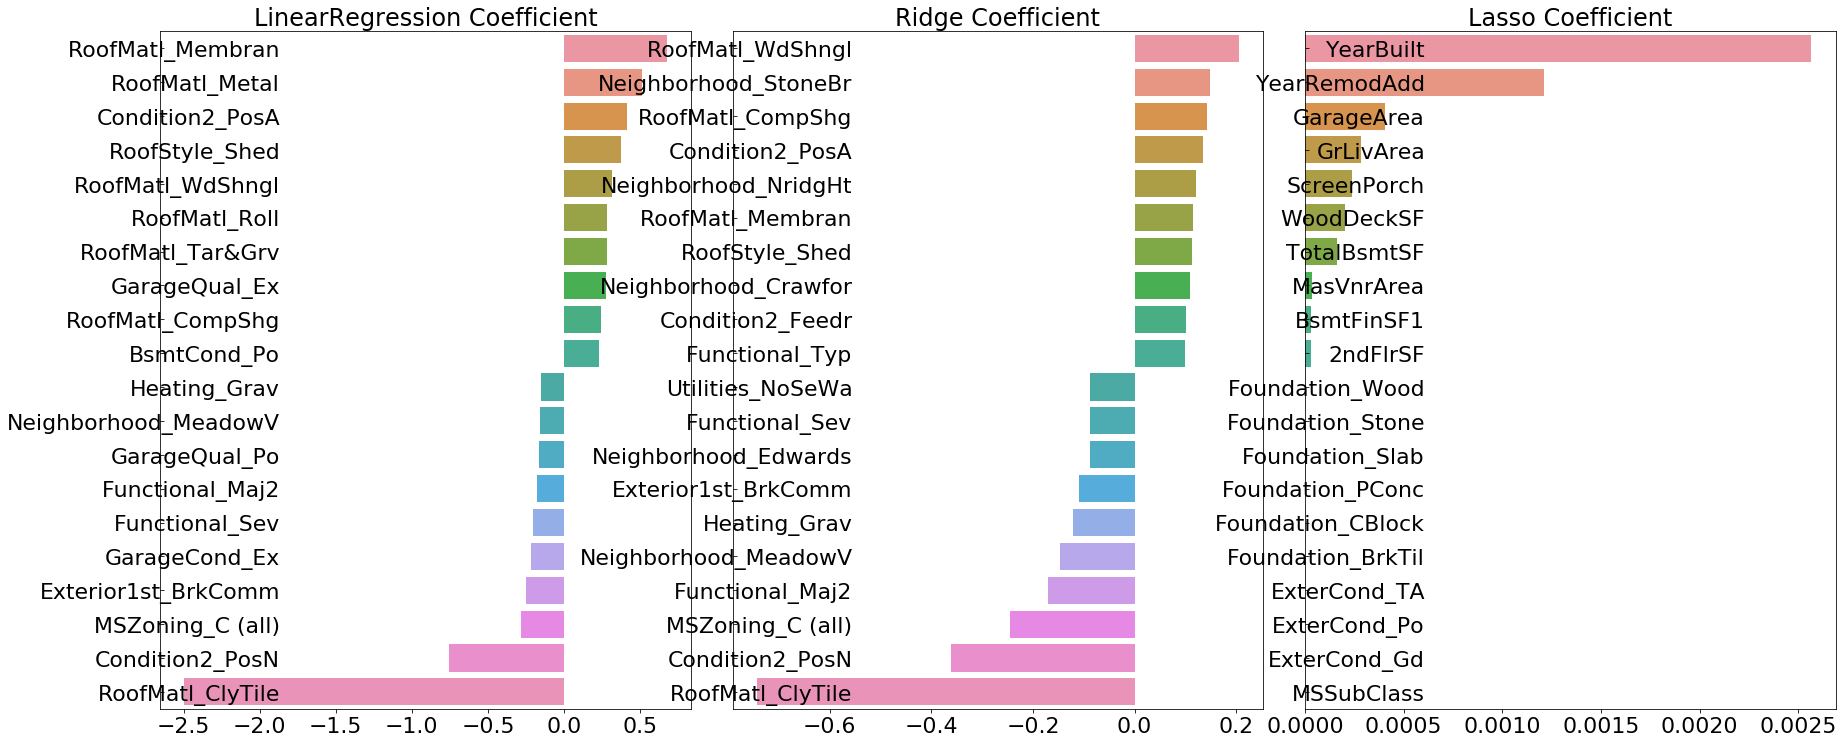

time: 1.78 s


In [9]:
def get_top_bottom_coef(model, X, n=10):
    coef = pd.Series(data=model.coef_, index=X.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

def visualize_coeff(models, X, n=10):
    fig, axs = plt.subplots(figsize=(24, 10), ncols=3, nrows=1)
    fig.tight_layout()
    
    for idx, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model, X, n=10)
        coef_concat = pd.concat([coef_high, coef_low])
        axs[idx].set_title(model.__class__.__name__+" Coefficient", size=24)
        axs[idx].tick_params(axis="y", direction="in", pad=-120)
        for label in (axs[idx].get_xticklabels() + axs[idx].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[idx])

visualize_coeff(models, X, n=10)

In [10]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params, X, y):
    
    gs = GridSearchCV(model, param_grid=params, n_jobs=-1, cv=5, scoring="neg_mean_squared_error")
    gs.fit(X, y)
    rmse = np.sqrt(-1 * gs.best_score_)
    print("### {0} ###\n mean RMSE : {1:.3f}\n best alpha : {2}\n".format(model.__class__.__name__, np.mean(rmse), gs.best_params_))
    

params = {
    "alpha" : [0.001, 0.05, 0.1, 1, 5, 8, 10, 15, 20]
}

print_best_params(ridge,params, X, y)
print_best_params(lasso,params, X, y)

### Ridge ###
 mean RMSE : 0.142
 best alpha : {'alpha': 10}

### Lasso ###
 mean RMSE : 0.142
 best alpha : {'alpha': 0.001}

time: 8.27 s


#### model : LinearRegression ####
 MSE : 0.013
 RMSE : 0.116

#### model : Ridge ####
 MSE : 0.013
 RMSE : 0.113

#### model : Lasso ####
 MSE : 0.012
 RMSE : 0.112



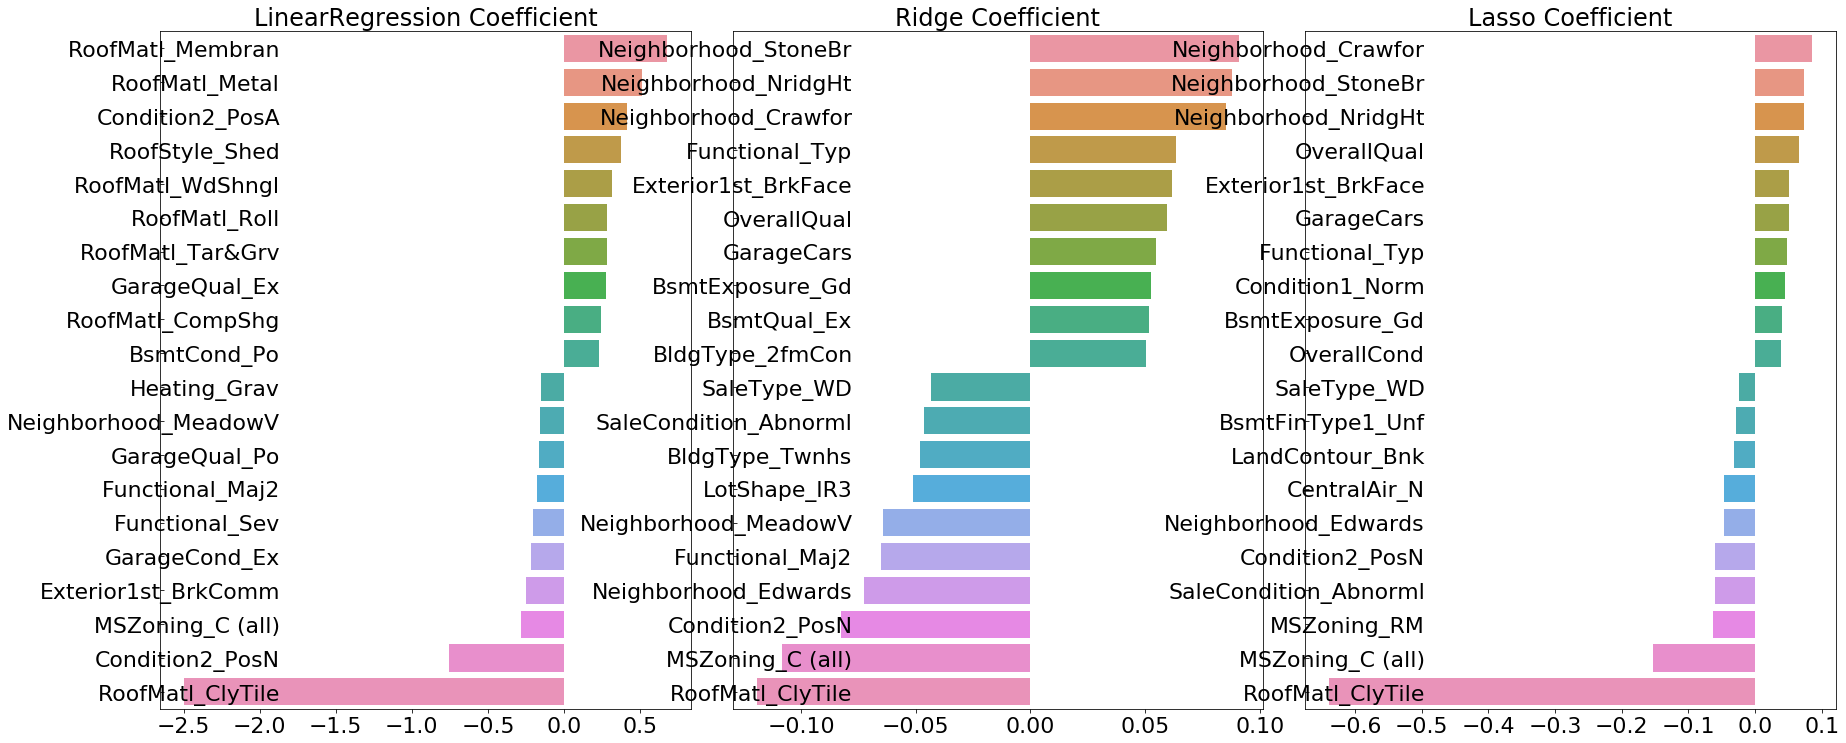

time: 1.83 s


In [11]:
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=0.001)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

models = [lr, ridge, lasso]
get_rmses(models, X_test, y_test)
visualize_coeff(models, X, n=10)

In [12]:
from scipy.stats import skew

ftr_idx = train.dtypes[train.dtypes != "object"].index
skew_ftrs = train[ftr_idx].apply(lambda x : skew(x))
skew_ftrs_top = skew_ftrs[skew_ftrs > 1]
print(skew_ftrs_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64
time: 31 ms


In [13]:
train[skew_ftrs_top.index] = np.log1p(train[skew_ftrs_top.index])
train_oh = pd.get_dummies(train)
y = train_oh["SalePrice"]
X = train_oh.drop("SalePrice", axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print_best_params(ridge,params, X, y)
print_best_params(lasso,params, X, y)

### Ridge ###
 mean RMSE : 0.128
 best alpha : {'alpha': 10}

### Lasso ###
 mean RMSE : 0.125
 best alpha : {'alpha': 0.001}

time: 1.8 s


#### model : LinearRegression ####
 MSE : 0.019
 RMSE : 0.136

#### model : Ridge ####
 MSE : 0.017
 RMSE : 0.129

#### model : Lasso ####
 MSE : 0.011
 RMSE : 0.104



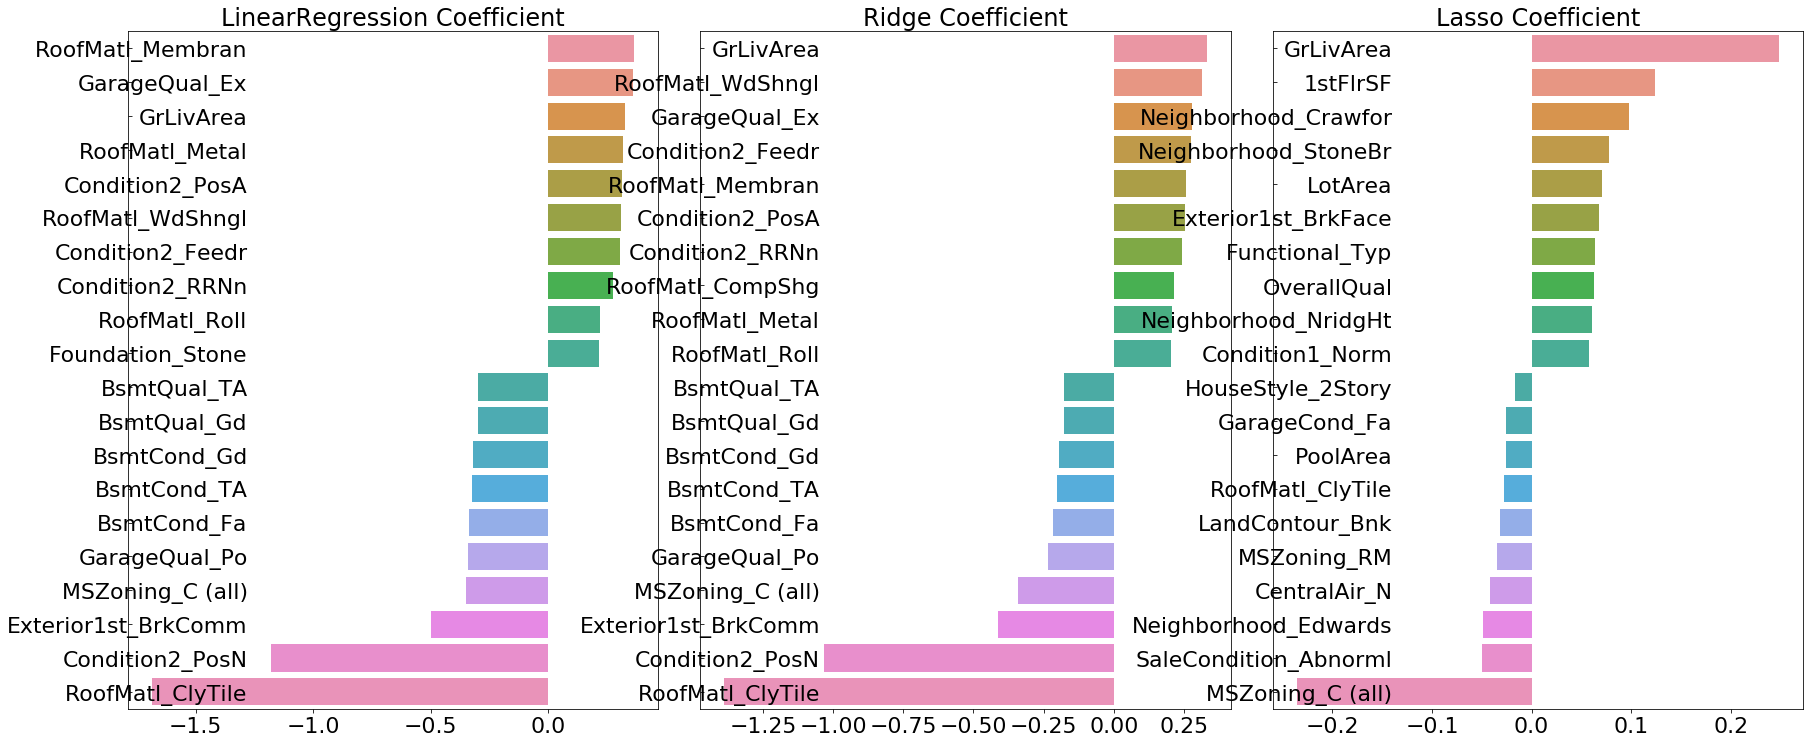

time: 2.11 s


In [15]:
lr = LinearRegression()
ridge = Ridge(alpha=0.10)
lasso = Lasso(alpha=0.001)
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

models = [lr, ridge, lasso]
get_rmses(models, X_test, y_test)
visualize_coeff(models, X, n=10)

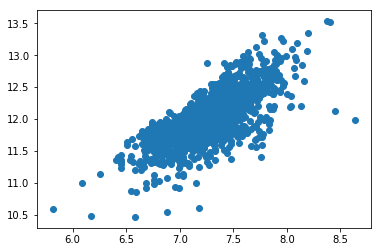

time: 234 ms


In [17]:
plt.scatter(x=train["GrLivArea"], y=y)

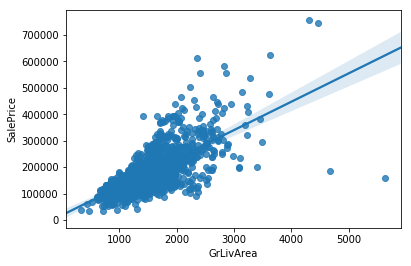

time: 1.3 s


In [19]:
train_org = pd.read_csv("./res/house-prices-advanced-regression-techniques/train.csv")
sns.regplot(x=train_org["GrLivArea"], y=train_org["SalePrice"])

In [21]:
cond1 = train_oh["GrLivArea"] > np.log1p(4000)
cond2 = train_oh["SalePrice"] < np.log1p(500000)
outlier = train_oh[cond1 & cond2].index
train_oh.drop(outlier, axis=0, inplace=True)

y = train_oh["SalePrice"]
X = train_oh.drop("SalePrice", axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print_best_params(ridge,params, X, y)
print_best_params(lasso,params, X, y)

### Ridge ###
 mean RMSE : 0.113
 best alpha : {'alpha': 8}

### Lasso ###
 mean RMSE : 0.112
 best alpha : {'alpha': 0.001}

time: 6.36 s


#### model : LinearRegression ####
 MSE : 0.011
 RMSE : 0.106

#### model : Ridge ####
 MSE : 0.009
 RMSE : 0.095

#### model : Lasso ####
 MSE : 0.010
 RMSE : 0.100



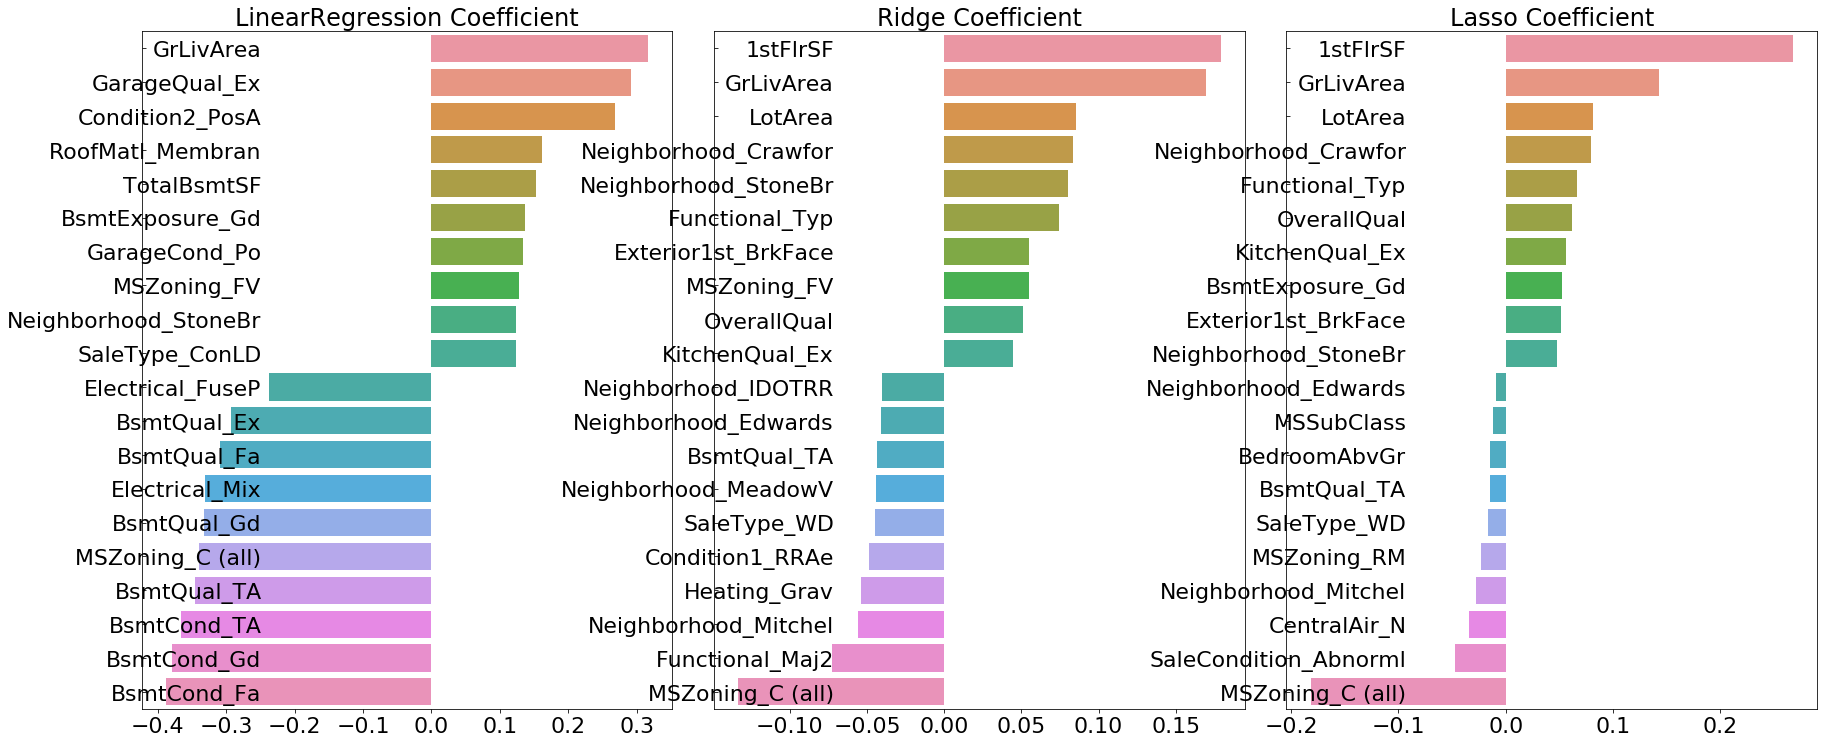

time: 2.05 s


In [22]:
lr = LinearRegression()
ridge = Ridge(alpha=8)
lasso = Lasso(alpha=0.001)
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

models = [lr, ridge, lasso]
get_rmses(models, X_test, y_test)
visualize_coeff(models, X, n=10)

In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_db(model, X_train, y_train, X_test, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    # (X rows, 1)
    train_fold_pred = np.zeros((X_train.shape[0], 1))
    test_pred = np.zeros((X_test.shape[0], n_folds))

    print("## model : {} ##".format(model.__class__.__name__))
    for fold_cnt, (train_idx, valid_idx) in enumerate(kf.split(X_train)):
        print("fond set : {}".format(fold_cnt))
        X_tr = X_train[train_idx]
        y_tr = y_train[train_idx]
        X_te = X_train[valid_idx]
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_idx, :] = model.predict(X_te).reshape(-1, 1)
        test_pred[:, fold_cnt] = model.predict(X_test)
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)
    return train_fold_pred, test_pred_mean

time: 0 ns


In [40]:
from lightgbm import LGBMRegressor


ridge = Ridge(alpha=8)
lasso = Lasso(alpha=0.001)
lgbm = LGBMRegressor(n_estimators=1000)

ridge_train, ridge_test = get_stacking_db(ridge, X_train.values, y_train.values, X_test.values, 5)
lasso_train, lasso_test = get_stacking_db(lasso, X_train.values, y_train.values, X_test.values, 5)
lgbm_train, lgbm_test = get_stacking_db(lgbm, X_train.values, y_train.values, X_test.values, 5)


X_stack_train = np.concatenate((ridge_train, lasso_train, lgbm_train), axis=1)
X_stack_test = np.concatenate((ridge_test, lasso_test, lgbm_test), axis=1)

final_lasso = Lasso(alpha=0.001)
final_lasso.fit(X_stack_train, y_train)
final_pred = final_lasso.predict(X_stack_test)

get_rmse(final_lasso,X_stack_test, y_test)

## model : Ridge ##
fond set : 0
fond set : 1
fond set : 2
fond set : 3
fond set : 4
## model : Lasso ##
fond set : 0
fond set : 1
fond set : 2
fond set : 3
fond set : 4
## model : LGBMRegressor ##
fond set : 0
fond set : 1
fond set : 2
fond set : 3
fond set : 4
#### model : Lasso ####
 MSE : 0.009
 RMSE : 0.096



0.0960165806845171

time: 16.1 s
